In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_train = pd.read_csv("./train.csv")
df_train = df_train.drop(columns="id")
display(df_train.head())
df_test = pd.read_csv("./test.csv")
display(df_test.head())
df_result = pd.read_csv("./sample_submit.csv")
display(df_result.head())
df_train_no = df_train[df_train["Attrition"] == 0]
df_train_yes = df_train[df_train["Attrition"] == 1]
display(df_train_no.head())
display(df_train_yes.head())


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,26,Travel_Rarely,450.941476,Research & Development,7.601074,3,Medical,4,Male,43,...,80,0,1,3,2,11,8,7,0,0
1,47,Travel_Rarely,730.235896,Research & Development,26.739489,3,Technical Degree,2,Male,98,...,80,1,20,1,1,5,9,4,4,0
2,26,Travel_Rarely,1082.560066,Human Resources,7.374739,3,Life Sciences,2,Male,84,...,80,1,4,3,3,3,2,0,2,0
3,46,Travel_Rarely,706.247579,Research & Development,14.791373,1,Medical,1,Female,79,...,80,1,6,0,1,5,4,7,7,1
4,25,Travel_Rarely,500.610860,Research & Development,2.146966,4,Medical,2,Male,98,...,80,1,8,3,3,1,0,0,0,0


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,34,Travel_Frequently,358.039056,Research & Development,9.926847,3,Life Sciences,1,Female,...,3,80,1,11,2,3,7,7,2,7
1,2,37,Travel_Rarely,749.376719,Research & Development,10.391959,3,Medical,1,Male,...,4,80,0,5,3,2,1,3,1,0
2,4,34,Travel_Frequently,958.484177,Research & Development,3.297025,3,Life Sciences,2,Female,...,3,80,1,21,2,2,4,3,1,4
3,5,34,Travel_Rarely,79.174592,Research & Development,2.430032,4,Medical,3,Female,...,4,80,3,9,3,3,20,6,1,4
4,6,29,Travel_Rarely,943.191218,Research & Development,10.017149,2,Life Sciences,3,Male,...,3,80,1,25,2,4,1,7,0,0


,1,0
0,2,0
1,4,0
2,5,0
3,6,0
4,8,0


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,26,Travel_Rarely,450.941476,Research & Development,7.601074,3,Medical,4,Male,43,...,80,0,1,3,2,11,8,7,0,0
1,47,Travel_Rarely,730.235896,Research & Development,26.739489,3,Technical Degree,2,Male,98,...,80,1,20,1,1,5,9,4,4,0
2,26,Travel_Rarely,1082.560066,Human Resources,7.374739,3,Life Sciences,2,Male,84,...,80,1,4,3,3,3,2,0,2,0
4,25,Travel_Rarely,500.610860,Research & Development,2.146966,4,Medical,2,Male,98,...,80,1,8,3,3,1,0,0,0,0
5,36,Non-Travel,1025.521404,Human Resources,1.689570,3,Life Sciences,1,Male,48,...,80,1,2,2,3,3,2,2,2,0


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
3,46,Travel_Rarely,706.247579,Research & Development,14.791373,1,Medical,1,Female,79,...,80,1,6,0,1,5,4,7,7,1
8,37,Travel_Rarely,350.271536,Sales,25.328335,3,Technical Degree,2,Female,57,...,80,0,6,3,3,3,2,2,0,1
9,17,Travel_Rarely,517.111386,Sales,6.342931,2,Marketing,3,Male,85,...,80,0,4,2,3,2,2,0,2,1
13,37,Travel_Rarely,1242.890611,Research & Development,20.645508,2,Medical,1,Female,78,...,80,1,5,5,1,5,5,0,0,1
14,26,Travel_Rarely,498.391752,Research & Development,25.946710,3,Life Sciences,3,Male,60,...,80,1,1,3,2,1,0,1,0,1


In [10]:
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1200 non-null   int64  
 1   Age                       1200 non-null   int64  
 2   BusinessTravel            1200 non-null   object 
 3   DailyRate                 1200 non-null   float64
 4   Department                1200 non-null   object 
 5   DistanceFromHome          1200 non-null   float64
 6   Education                 1200 non-null   int64  
 7   EducationField            1200 non-null   object 
 8   EnvironmentSatisfaction   1200 non-null   int64  
 9   Gender                    1200 non-null   object 
 10  HourlyRate                1200 non-null   int64  
 11  JobInvolvement            1200 non-null   int64  
 12  JobLevel                  1200 non-null   int64  
 13  JobRole                   1200 non-null   object 
 14  JobSatis

None

In [11]:
print(df_train.isnull().sum())

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int

In [18]:
print(df_train["JobRole"].value_counts())

Research Scientist           252
Sales Executive              249
Laboratory Technician        179
Manufacturing Director       129
Sales Representative         101
Healthcare Representative     92
Research Director             90
Manager                       75
Human Resources               33
Name: JobRole, dtype: int64


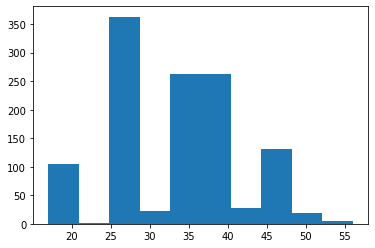

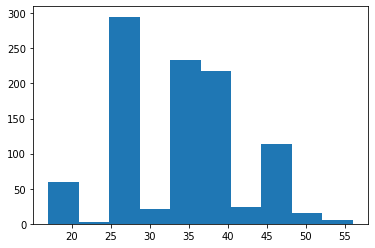

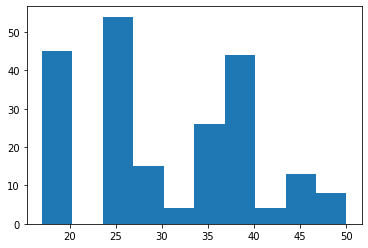

In [36]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train,x="Age",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_no,x="Age",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_yes,x="Age",bins=10)
plt.show()

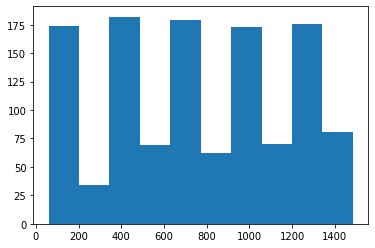

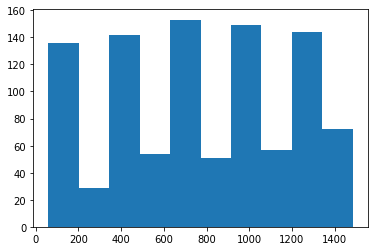

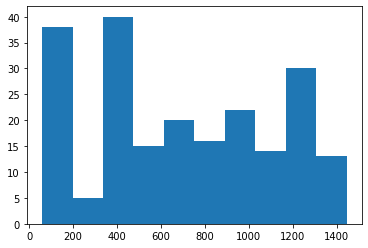

In [38]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train,x="DailyRate",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_no,x="DailyRate",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_yes,x="DailyRate",bins=10)
plt.show()

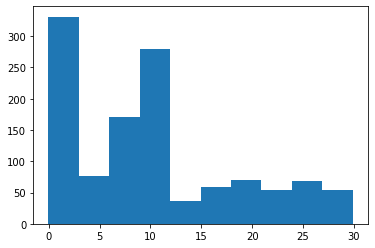

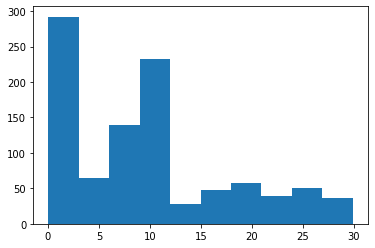

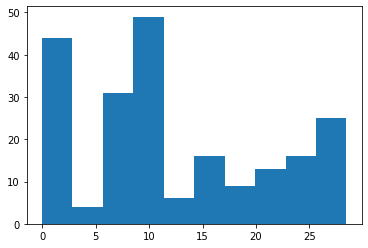

In [49]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train,x="DistanceFromHome",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_no,x="DistanceFromHome",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_yes,x="DistanceFromHome",bins=10)
plt.show()

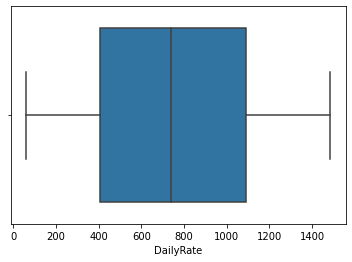

In [54]:
box,ax = plt.subplots()
sns.boxplot(data=df_train,x="DailyRate",ax=ax)
plt.show()